In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [7]:
data = pd.read_excel('Base de datos v1.xlsx')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               20000 non-null  int64  
 1   Edad                     19700 non-null  float64
 2   Genero                   20000 non-null  object 
 3   Estado_Civil             20000 non-null  object 
 4   Ingreso_Mensual          19500 non-null  float64
 5   Transacciones_Mensuales  20000 non-null  int64  
 6   Monto_Promedio_Compra    19800 non-null  float64
 7   Uso_Linea_Credito_Pct    20000 non-null  float64
 8   Pagos_Atrasados          20000 non-null  int64  
 9   Antiguedad_Meses         20000 non-null  int64  
 10  Productos_Adicionales    20000 non-null  int64  
 11  Fuga                     20000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1.8+ MB


In [9]:
data.describe()

,ID_Cliente,Edad,Ingreso_Mensual,Transacciones_Mensuales,Monto_Promedio_Compra,Uso_Linea_Credito_Pct,Pagos_Atrasados,Antiguedad_Meses,Productos_Adicionales,Fuga
count,20000.000000,19700.000000,19500.000000,20000.000000,19800.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,10000.500000,40.187360,4006.623795,31.496050,519.013752,0.285052,0.802350,35.80920,1.088500,0.185350
std,5773.647028,11.628559,2848.305669,31.443938,413.345305,0.159271,0.894217,35.80716,1.204259,0.388591
min,1.000000,18.000000,200.000000,12.000000,23.540000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,5000.750000,32.000000,1916.000000,26.000000,252.875000,0.160000,0.000000,10.00000,0.000000,0.000000
50%,10000.500000,40.000000,3351.000000,30.000000,406.355000,0.260000,1.000000,25.00000,1.000000,0.000000
75%,15000.250000,48.000000,5373.000000,34.000000,647.460000,0.390000,1.000000,50.00000,2.000000,0.000000
max,20000.000000,75.000000,28733.000000,967.000000,6635.400000,0.900000,6.000000,240.00000,8.000000,1.000000


In [13]:
data.isnull().sum()/len(data)*100

ID_Cliente                 0.0
Edad                       1.5
Genero                     0.0
Estado_Civil               0.0
Ingreso_Mensual            2.5
Transacciones_Mensuales    0.0
Monto_Promedio_Compra      1.0
Uso_Linea_Credito_Pct      0.0
Pagos_Atrasados            0.0
Antiguedad_Meses           0.0
Productos_Adicionales      0.0
Fuga                       0.0
dtype: float64

## Imputación nulos

# Análisis Univariado

In [25]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [26]:
numeric_cols = numeric_cols.drop(['ID_Cliente','Fuga'])

In [27]:
from scipy.stats import skew, kurtosis, shapiro

def plot_numeric_distributions(data, numeric_cols):  
    cols_per_row = 2
    n = len(numeric_cols)
    rows = -(-n // cols_per_row)  

    plt.figure(figsize=(cols_per_row * 7, rows * 4))

    for idx, col in enumerate(numeric_cols, 1):
        sk = skew(data[col].dropna())
        kt = kurtosis(data[col].dropna())
        _, p = shapiro(data[col].dropna())

        plt.subplot(rows, cols_per_row*2, idx*2-1)
        sns.histplot(data[col], kde=True, bins=20, color="skyblue")
        plt.title(f"{col}\nSkew: {sk:.2f}, Kurt: {kt:.2f}, p={p:.2g}")

        plt.subplot(rows, cols_per_row*2, idx*2)
        sns.boxplot(y=data[col], color="lightcoral", showmeans=True)
        plt.title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19700.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19500.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_

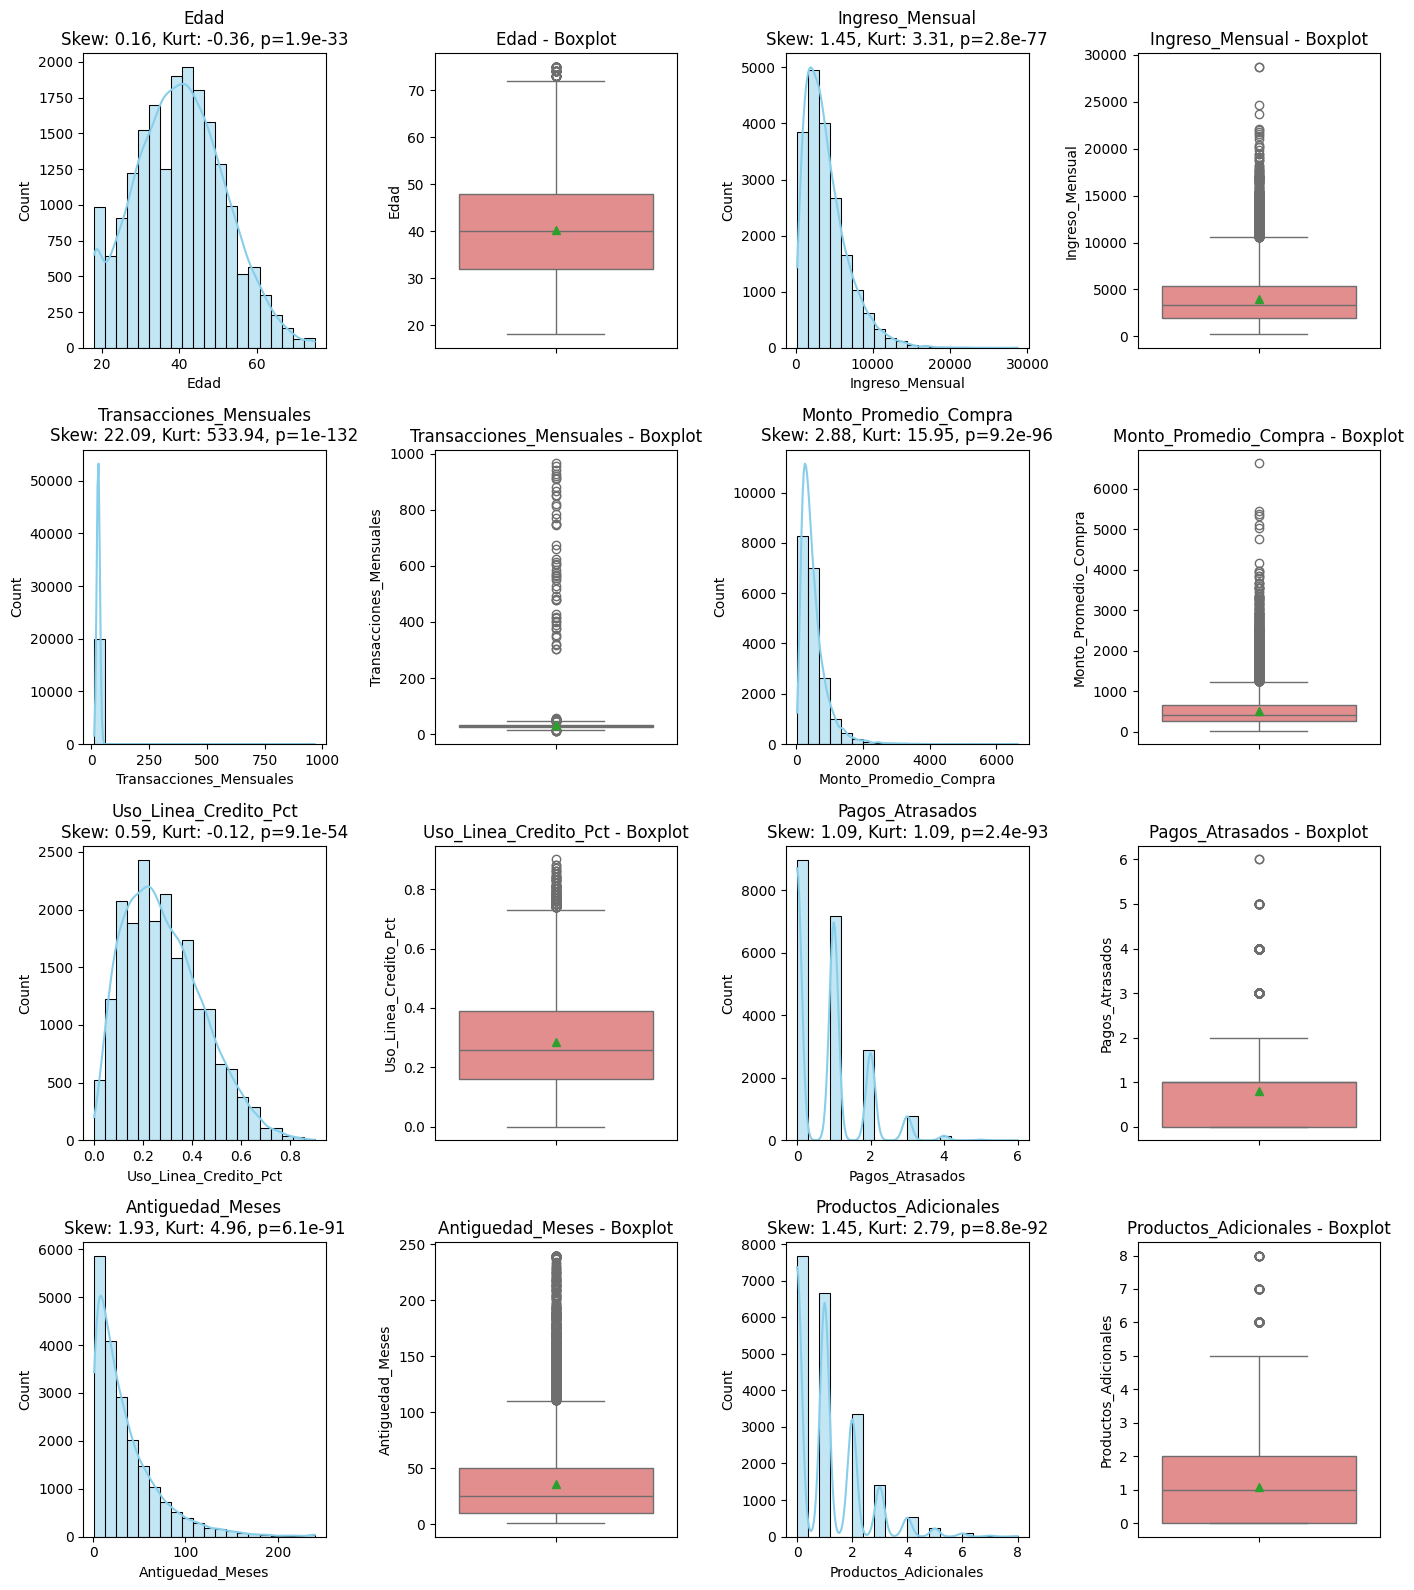

In [28]:
plot_numeric_distributions(data, numeric_cols)

In [32]:
categorical_cols = [col for col in data.select_dtypes(include=['object', 'category']).columns if col != 'Fuga']
categorical_cols.append('Pagos_Atrasados')
categorical_cols.append('Productos_Adicionales')

In [33]:
def plot_categorical_distributions(data, categorical_cols):
    cols_per_row = 3
    n = len(categorical_cols)
    rows = -(-n // cols_per_row)  

    plt.figure(figsize=(cols_per_row * 6, rows * 4))

    for idx, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, cols_per_row, idx)
        sns.countplot(data=data, x=col, hue=col, palette="Set2")
        plt.title(f"{col} Distribution")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

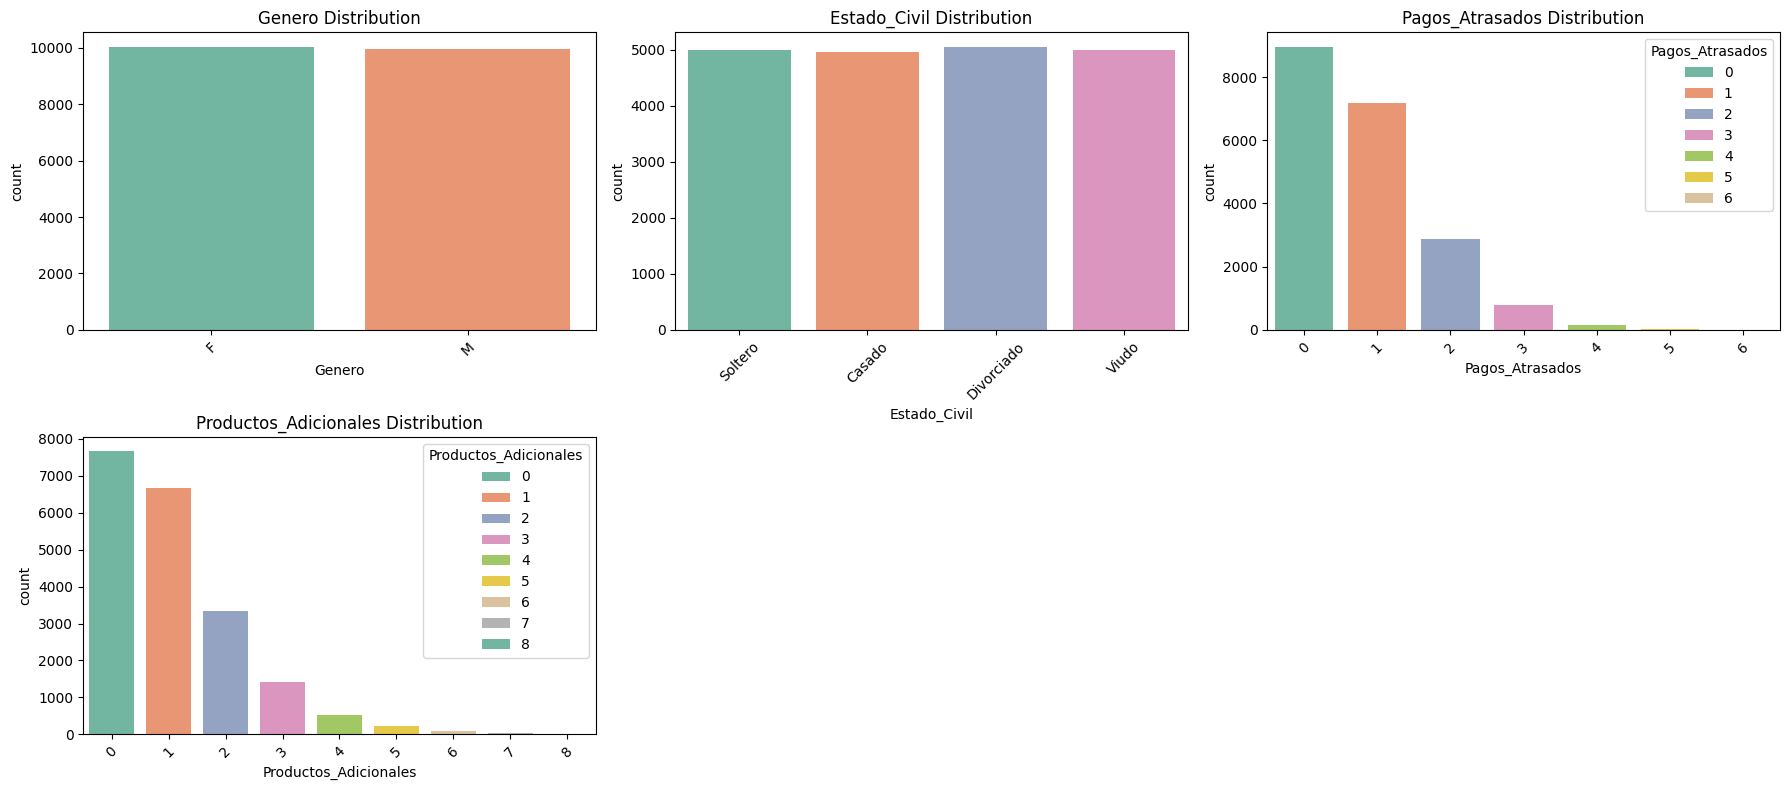

In [34]:
plot_categorical_distributions(data, categorical_cols)

# Análisis Multivariado

# Entrenamiento